<a href="https://colab.research.google.com/github/mr-alamdari/NLP-ChatBots/blob/main/NLP_ChatBots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
!wget https://raw.githubusercontent.com/mr-alamdari/NLP-ChatBots/main/train_qa.txt

--2022-05-02 08:52:36--  https://raw.githubusercontent.com/mr-alamdari/NLP-ChatBots/main/train_qa.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3804342 (3.6M) [application/octet-stream]
Saving to: ‘train_qa.txt.1’

train_qa.txt.1      100%[===================>]   3.63M  --.-KB/s    in 0.07s   

2022-05-02 08:52:36 (48.8 MB/s) - ‘train_qa.txt.1’ saved [3804342/3804342]



In [5]:
!wget https://raw.githubusercontent.com/mr-alamdari/NLP-ChatBots/main/test_qa.txt

--2022-05-02 08:52:36--  https://raw.githubusercontent.com/mr-alamdari/NLP-ChatBots/main/test_qa.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 377233 (368K) [application/octet-stream]
Saving to: ‘test_qa.txt.1’

test_qa.txt.1       100%[===================>] 368.39K  --.-KB/s    in 0.03s   

2022-05-02 08:52:36 (10.4 MB/s) - ‘test_qa.txt.1’ saved [377233/377233]



In [6]:
with open('train_qa.txt', 'rb') as f:
  train_data = pickle.load(f)

In [7]:
with open('test_qa.txt', 'rb') as f:
  test_data = pickle.load(f)

In [8]:
len(train_data)

10000

In [9]:
len(test_data)

1000

In [10]:
' '.join(train_data[10][0])

'Sandra went back to the hallway . Sandra moved to the office .'

In [11]:
' '.join(train_data[10][1])

'Is Sandra in the office ?'

In [12]:
train_data[10][2]

'yes'

In [13]:
all_data = train_data + train_data

In [14]:
vocab = set(['yes', 'no'])
for story, question, answer in all_data:
  vocab = vocab.union(set(story))
  vocab = vocab.union(set(question))

In [15]:
vocab_len = len(vocab) + 1

In [16]:
vocab_len

38

In [17]:
all_story_length = [len(data[0]) for data in all_data]

In [18]:
max_story_len = max(all_story_length)

In [19]:
max_story_len

156

In [20]:
all_question_length = [len(data[1]) for data in all_data]

In [21]:
max_question_length = max(all_question_length)

In [22]:
max_question_length

6

In [23]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(vocab)

In [24]:
tokenizer.word_index

{'apple': 17,
 'back': 7,
 'bathroom': 31,
 'bedroom': 27,
 'daniel': 11,
 'discarded': 9,
 'down': 5,
 'dropped': 4,
 'football': 28,
 'garden': 15,
 'got': 12,
 'grabbed': 14,
 'hallway': 18,
 'in': 23,
 'is': 30,
 'john': 8,
 'journeyed': 26,
 'kitchen': 16,
 'left': 19,
 'mary': 33,
 'milk': 20,
 'moved': 29,
 'no': 2,
 'office': 35,
 'picked': 10,
 'put': 1,
 'sandra': 34,
 'the': 32,
 'there': 3,
 'to': 25,
 'took': 13,
 'travelled': 24,
 'up': 6,
 'went': 22,
 'yes': 21}

In [25]:
train_story_text = []
train_question_text = []
train_answers = []

In [26]:
for story, question, answer in train_data:
  train_story_text.append(story)
  train_question_text.append(question)
  train_answers.append(answer)

In [27]:
train_story_text[20]

['Daniel',
 'got',
 'the',
 'apple',
 'there',
 '.',
 'John',
 'picked',
 'up',
 'the',
 'football',
 'there',
 '.',
 'Daniel',
 'left',
 'the',
 'apple',
 '.',
 'Daniel',
 'moved',
 'to',
 'the',
 'kitchen',
 '.']

In [28]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [29]:
train_story_seq[20]

[11, 12, 32, 17, 3, 8, 10, 6, 32, 28, 3, 11, 19, 32, 17, 11, 29, 25, 32, 16]

In [30]:
len(train_story_seq), len(train_story_text)

(10000, 10000)

In [31]:
def vectorize_texts(data, max_story_len=max_story_len, max_question_len=max_question_length, word_index=tokenizer.word_index, vocab_len=vocab_len):
  stories = []
  questions = []
  answers = []

  for story, question, answer in data:
    s = [word_index[word.lower()] for word in story if word.isalpha()]
    q = [word_index[word.lower()] for word in question if word.isalpha()]
    y = np.zeros(vocab_len)
    y[word_index[answer]] = 1

    stories.append(s)
    questions.append(q)
    answers.append(y)
  
  return (tf.keras.preprocessing.sequence.pad_sequences(stories, maxlen=max_story_len),
          tf.keras.preprocessing.sequence.pad_sequences(questions, maxlen=max_question_length),
          np.array(answers))

In [32]:
data = train_data
inputs_train, questions_train, answers_train = vectorize_texts(data)

In [33]:
data = test_data
inputs_test, questions_test, answers_test = vectorize_texts(data)

In [34]:
inputs_train

array([[ 0,  0,  0, ..., 25, 32, 27],
       [ 0,  0,  0, ..., 25, 32, 18],
       [ 0,  0,  0, ..., 25, 32, 31],
       ...,
       [ 0,  0,  0, ..., 25, 32, 27],
       [ 0,  0,  0, ..., 32, 20,  3],
       [ 0,  0,  0, ..., 32, 17,  3]], dtype=int32)

In [35]:
questions_train

array([[ 0, 30, 34, 23, 32, 18],
       [ 0, 30, 11, 23, 32, 31],
       [ 0, 30, 11, 23, 32, 35],
       ...,
       [ 0, 30, 34, 23, 32, 18],
       [ 0, 30, 33, 23, 32, 16],
       [ 0, 30, 33, 23, 32, 27]], dtype=int32)

In [36]:
answers_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
len(answers_test)

1000

In [38]:
sum(answers_test)

array([  0.,   0., 503.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 497.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [39]:
#(max_story_len, batch_size) ==> scince we don't know the batch size, we use (max_story_len, ) to select it automaticaly
input_sequence = tf.keras.layers.Input((max_story_len, ))
question = tf.keras.layers.Input((max_question_length, ))

In [40]:
vocab_len = len(vocab) + 1 

###Input Encoder M

In [41]:
input_encoder_m = tf.keras.models.Sequential()
input_encoder_m.add(tf.keras.layers.Embedding(input_dim=vocab_len, output_dim=64))
input_encoder_m.add(tf.keras.layers.Dropout(0.3))

#(samples, story_maxlen, embedding_dim)

###Input Encoder C

In [42]:
input_encoder_c = tf.keras.models.Sequential()
input_encoder_c.add(tf.keras.layers.Embedding(input_dim=vocab_len, output_dim=max_question_length))
input_encoder_c.add(tf.keras.layers.Dropout(0.3))

#(samples, story_maxlen, max_question_len)

###Question Encoder

In [43]:
question_encoder = tf.keras.models.Sequential()
question_encoder.add(tf.keras.layers.Embedding(input_dim=vocab_len, output_dim=64, input_length=max_question_length))
question_encoder.add(tf.keras.layers.Dropout(0.3))

#(samples, query_maxlen, embedding_len)

In [44]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [45]:
match = tf.keras.layers.dot([input_encoded_m, question_encoded], axes=(2, 2))
match = tf.keras.layers.Activation('softmax')(match)

In [46]:
match.shape

TensorShape([None, 156, 6])

In [47]:
response = tf.keras.layers.add([match, input_encoded_c])
response = tf.keras.layers.Permute((2, 1))(response)

In [48]:
response.shape

TensorShape([None, 6, 156])

In [49]:
answer = tf.keras.layers.concatenate([response, question_encoded])

In [50]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [51]:
answer.shape

TensorShape([None, 6, 220])

In [52]:
answer = tf.keras.layers.LSTM(32)(answer)

In [53]:
answer = tf.keras.layers.Dropout(0.5)(answer)

In [54]:
answer = tf.keras.layers.Dense(vocab_len)(answer)

In [55]:
answer = tf.keras.layers.Activation('softmax')(answer)

In [56]:
model = tf.keras.models.Model([input_sequence, question], answer)

In [57]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, None, 64)     2432        ['input_1[0][0]']                
                                                                                                  
 sequential_2 (Sequential)      (None, 6, 64)        2432        ['input_2[0][0]']                
                                                                                              

In [120]:
history = model.fit([inputs_train, questions_train],
                    answers_train,
                    batch_size=32, 
                    epochs=100,
                    validation_data=([inputs_test, questions_test], answers_test))

Epoch 1/100
313/313 [==============================] - 6s 18ms/step - loss: 0.5502 - accuracy: 0.7355 - val_loss: 0.5329 - val_accuracy: 0.7400
Epoch 2/100
313/313 [==============================] - 6s 18ms/step - loss: 0.4863 - accuracy: 0.7824 - val_loss: 0.4483 - val_accuracy: 0.7900
Epoch 3/100
313/313 [==============================] - 6s 18ms/step - loss: 0.4398 - accuracy: 0.8114 - val_loss: 0.4072 - val_accuracy: 0.8140
Epoch 4/100
313/313 [==============================] - 5s 17ms/step - loss: 0.4132 - accuracy: 0.8283 - val_loss: 0.3866 - val_accuracy: 0.8280
Epoch 5/100
313/313 [==============================] - 5s 17ms/step - loss: 0.4062 - accuracy: 0.8352 - val_loss: 0.3871 - val_accuracy: 0.8280
Epoch 6/100
313/313 [==============================] - 5s 17ms/step - loss: 0.3947 - accuracy: 0.8366 - val_loss: 0.3921 - val_accuracy: 0.8350
Epoch 7/100
313/313 [==============================] - 5s 17ms/step - loss: 0.3819 - accuracy: 0.8451 - val_loss: 0.3623 - val_accuracy:

In [65]:
def plot_history(hist, name='accuracy'):
  train_hist = hist.history[name]
  val_hist = hist.history[f'val_{name}']
  plt.plot(train_hist)
  plt.plot(val_hist)
  plt.title(f'Model {name}')
  plt.xlabel('epoch')
  plt.ylabel(name)
  plt.legend(['Train', 'Validation'])
  plt.show()

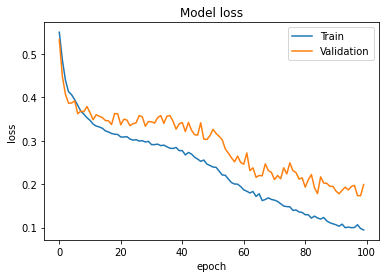

In [121]:
plot_history(history, name='loss')

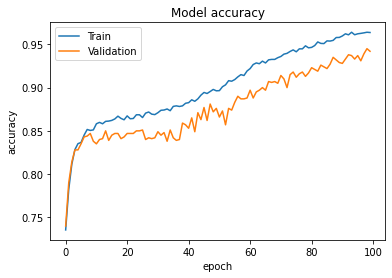

In [122]:
plot_history(history)

In [123]:
model.save('my_model.h5')

In [124]:
pred_results = model.predict(([inputs_test, questions_test]))

In [125]:
pred_results

array([[4.3131968e-19, 4.5871022e-19, 1.0000000e+00, ..., 4.3995085e-19,
        5.9640244e-19, 4.0319218e-19],
       [1.1469801e-19, 1.2331052e-19, 1.0000000e+00, ..., 1.2403847e-19,
        1.4167907e-19, 8.8909431e-20],
       [6.3183371e-17, 6.1810906e-17, 8.2239166e-02, ..., 5.6448254e-17,
        7.2875790e-17, 5.8277673e-17],
       ...,
       [2.3353190e-15, 2.2673230e-15, 9.9962640e-01, ..., 2.4193971e-15,
        2.7860479e-15, 2.1785842e-15],
       [9.3077645e-17, 8.1085657e-17, 4.7909688e-02, ..., 7.1293546e-17,
        1.1168402e-16, 9.0567383e-17],
       [7.1087865e-16, 7.1553373e-16, 2.5013508e-02, ..., 6.8052559e-16,
        8.0782665e-16, 5.9478892e-16]], dtype=float32)

In [126]:
pred_results.shape

(1000, 38)

In [127]:
pred_results[0]

array([4.3131968e-19, 4.5871022e-19, 1.0000000e+00, 4.5802479e-19,
       3.8425636e-19, 4.1741832e-19, 4.4780400e-19, 4.9329707e-19,
       3.3842531e-19, 4.0891710e-19, 3.3913612e-19, 4.1322622e-19,
       4.6640693e-19, 4.3901205e-19, 3.4808554e-19, 3.9195475e-19,
       4.6778961e-19, 4.5734739e-19, 4.7231175e-19, 3.6350142e-19,
       4.8338693e-19, 3.8541387e-08, 4.0051871e-19, 3.9001581e-19,
       4.1958951e-19, 5.1339807e-19, 3.1895368e-19, 3.8436193e-19,
       3.3340737e-19, 3.7944949e-19, 4.1910959e-19, 4.1190736e-19,
       5.4449505e-19, 4.1669921e-19, 3.3714964e-19, 4.3995085e-19,
       5.9640244e-19, 4.0319218e-19], dtype=float32)

In [128]:
" ".join(test_data[0][0])

'Mary got the milk there . John moved to the bedroom .'

In [129]:
" ".join(test_data[0][1])

'Is John in the kitchen ?'

In [130]:
test_data[0][2]

'no'

In [131]:
val_max = np.argmax(pred_results[0])

In [132]:
val_max

2

In [135]:
print('No: ', tokenizer.word_index['no'])
print('Yes: ', tokenizer.word_index['yes'])

No:  2
Yes:  21


In [136]:
def show_results(num):
  prob = pred_results[0][num]
  res = 'No' if num == 2 else 'Yes'
  return res, prob, num

In [137]:
show_results(val_max)

('No', 1.0, 2)

####My Story

In [150]:
my_story = 'John left the garden . Sandra picked up milk in the kitchen . '
my_question = 'Is John in the garden ?' 
answer='yes'

In [151]:
my_data = [(my_story.split(), my_question.split(), answer)]

In [140]:
my_story, my_question, my_answer = vectorize_texts(my_data)

In [141]:
my_answer

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]])

In [142]:
pred_results = model.predict(([my_story, my_question]))

In [143]:
val_max = np.argmax(pred_results[0])

In [144]:
show_results(val_max)

('No', 0.9999037, 2)

In [145]:
history = model.fit([inputs_train, questions_train],
                    answers_train,
                    batch_size=16, 
                    epochs=100,
                    validation_data=([inputs_test, questions_test], answers_test))

Epoch 1/100
625/625 [==============================] - 8s 11ms/step - loss: 0.0973 - accuracy: 0.9648 - val_loss: 0.1781 - val_accuracy: 0.9430
Epoch 2/100
625/625 [==============================] - 7s 12ms/step - loss: 0.1009 - accuracy: 0.9643 - val_loss: 0.1786 - val_accuracy: 0.9450
Epoch 3/100
625/625 [==============================] - 7s 11ms/step - loss: 0.1009 - accuracy: 0.9645 - val_loss: 0.1681 - val_accuracy: 0.9440
Epoch 4/100
625/625 [==============================] - 7s 11ms/step - loss: 0.0974 - accuracy: 0.9652 - val_loss: 0.1612 - val_accuracy: 0.9450
Epoch 5/100
625/625 [==============================] - 7s 11ms/step - loss: 0.0948 - accuracy: 0.9667 - val_loss: 0.1865 - val_accuracy: 0.9410
Epoch 6/100
625/625 [==============================] - 7s 11ms/step - loss: 0.0973 - accuracy: 0.9663 - val_loss: 0.1770 - val_accuracy: 0.9450
Epoch 7/100
625/625 [==============================] - 7s 11ms/step - loss: 0.0989 - accuracy: 0.9656 - val_loss: 0.1640 - val_accuracy:

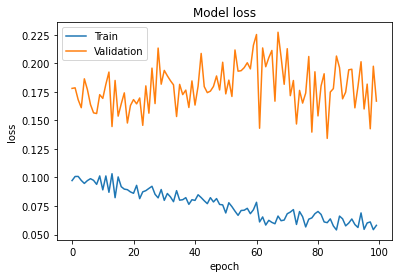

In [146]:
plot_history(history, name='loss')

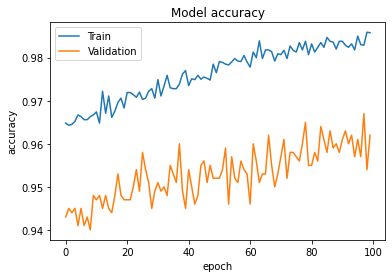

In [148]:
plot_history(history)

In [184]:
my_story = 'John left the garden . Sandra picked up milk in the kitchen . '
my_question = 'Is John in the garden ?' 
answer='no'

In [185]:
my_data = [(my_story.split(), my_question.split(), answer)]

In [186]:
my_story, my_question, my_answer = vectorize_texts(my_data)

In [187]:
pred_results = model.predict(([my_story, my_question]))

In [188]:
val_max = np.argmax(pred_results[0])
show_results(val_max)

('No', 0.99999905, 2)

In [209]:
story_2 ='Daniel grabbed the apple . John mary Sandra in office . '
question_2 = 'Sandra mary to John ? '
answer_2 = 'yes'

In [210]:
my_data_2 = [(story_2.split(), question_2.split(), answer_2)]

In [211]:
my_story, my_question, my_answer = vectorize_texts(my_data_2)

In [212]:
pred_results = model.predict(([my_story, my_question]))

In [213]:
val_max = np.argmax(pred_results[0])
show_results(val_max)

('Yes', 0.8889464, 21)